## Introduction To The Data

This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: [Web Link](http://www.dsi.uminho.pt/~pcortez/forestfires))

- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
-  month - month of the year: 'jan' to 'dec'
-  day - day of the week: 'mon' to 'sun'
-  FFMC - FFMC index from the FWI system: 18.7 to 96.20
-  DMC - DMC index from the FWI system: 1.1 to 291.3
-  DC - DC index from the FWI system: 7.9 to 860.6
-  ISI - ISI index from the FWI system: 0.0 to 56.10
-  temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40
-  rain - outside rain in mm/m2 : 0.0 to 6.4
-  area - the burned area of the forest (in ha): 0.00 to 1090.84


In this project, I'll:

- Prepare the data for machine learning
- Train a model using Random Forest and other Regressor models
- Measure the accuracy of the model using RMSE and MSE

In [44]:
import pandas as pd
forest_fires = pd.read_csv("forestfires.csv")
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [45]:
display(forest_fires)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


## Finding Missing Values

In [46]:
forest_fires.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

## Feature Selection

The "month" and "day" feature will need a cogent domain knowledge to be useful in this machine learning model

In [47]:
forest_fires = forest_fires.drop(["month", "day"], axis=1)

## Data Cleaning and Feature Engineering



In [48]:
forest_fires["area"].value_counts()

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
2.14       2
2.18       2
1.56       2
9.96       2
28.66      2
1.46       2
0.68       2
0.43       2
1.64       2
6.43       2
9.27       2
0.52       2
1.75       2
11.06      2
1.63       2
17.20      1
48.55      1
0.95       1
0.77       1
11.19      1
15.64      1
2.64       1
3.52       1
38.48      1
5.39       1
        ... 
1.61       1
1.07       1
6.38       1
5.86       1
3.19       1
11.16      1
8.85       1
86.45      1
5.18       1
30.18      1
2.01       1
1.01       1
20.03      1
0.79       1
49.59      1
4.41       1
7.02       1
0.71       1
9.41       1
0.09       1
3.32       1
11.53      1
5.55       1
3.20       1
4.88       1
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

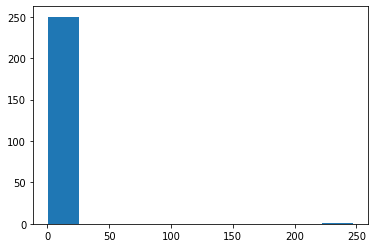

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(forest_fires["area"].value_counts())
plt.show()

The area (target) variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform

In [50]:
import numpy as np
forest_fires = np.log(forest_fires + 1)

In [51]:
forest_fires.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2.079442,1.791759,4.468204,3.303217,4.557030,1.808289,2.219203,3.951244,2.041220,0.000000,0.0
1,2.079442,1.609438,4.517431,3.594569,6.507427,2.041220,2.944439,3.526361,0.641854,0.000000,0.0
2,2.079442,1.609438,4.517431,3.799974,6.533643,2.041220,2.747271,3.526361,0.832909,0.000000,0.0
3,2.197225,1.945910,4.529368,3.535145,4.363099,2.302585,2.230014,4.584967,1.609438,0.182322,0.0
4,2.197225,1.945910,4.503137,3.956996,4.636669,2.360854,2.517696,4.605170,1.029619,0.000000,0.0


In [52]:
forest_fires_features = forest_fires.drop(["area"], axis=1)

In [53]:
forest_fires.corr()["area"]

X       0.047338
Y       0.046043
FFMC    0.049884
DMC     0.062425
DC      0.069006
ISI     0.009372
temp    0.012825
RH     -0.049758
wind    0.066708
rain   -0.001255
area    1.000000
Name: area, dtype: float64

 Because of co-linearity that exist between:
 - X & Y
 - RH & FFMC 
 
 I'll drop each amongst the pair

In [54]:
forest_fires_features = forest_fires_features.drop(["RH","Y"], axis=1)

Because most of the features are not strongly correlated with the target column, a decision tree machine learning model will be effective here - I'll use Random Forest Regressor Model

## Training a Model with a Random Forest Regressor Model

In [59]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
X = forest_fires_features
Y = forest_fires["area"]
rf = RandomForestRegressor(random_state=2)
predictions = cross_val_predict(rf, X, Y, cv=10)

In [61]:
forest_fires['squared_error'] = (predictions - forest_fires["area"])**(2)
mse = forest_fires['squared_error'].mean()
print("MSE: {}".format(mse))
rmse = np.sqrt(mse)
print("RMSE: {}".format(rmse))

MSE: 3.097741003392325
RMSE: 1.7600400573260613


Since the model performed better with the Random Regressor Model, and the data is not very roboust, I can try to squeeze out the last percentage of accuracy from the machine learning model by using the GradientBoostingRegressor Model

## Training a Model with a Gradient Boosting Regressor Model

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=2, learning_rate=0.0001)
gbr_predictions = cross_val_predict(gbr, X, Y, cv=10)

In [63]:
forest_fires['squared_errors'] = (gbr_predictions - forest_fires["area"])**(2)
mse = forest_fires['squared_errors'].mean()
print("MSE: {}".format(mse))
rmse = np.sqrt(mse)
print("RMSE: {}".format(rmse))

MSE: 2.1096031296457283
RMSE: 1.4524472897994365
